## Theano


- Define a `function` set(Model)
- Define what is the `best function`
- Pick the `best function` by data
    - gradient descent

### Power of Theano
- After defining a `cost function`, Theano can automatically compute the `gradient`.
- To use Theano in deep learning you only have to learn
    - How to define a function
    - How to compute the gradient

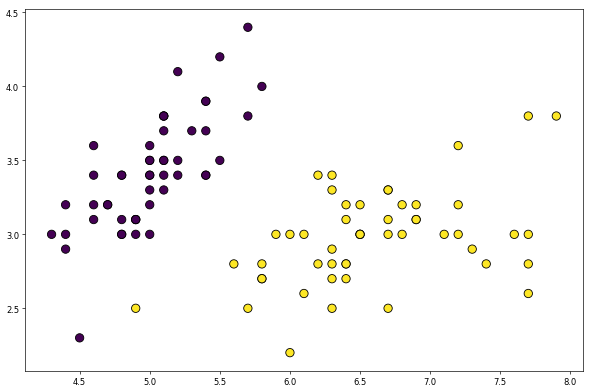

In [32]:
import matplotlib.pylab as plt
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] / 2

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

### Compute gradients
- Computing the gradients with respect to a variable in so simple
- Given a function with input variable x and output variable y
    - ex) To compute dy/dx , simple g = T.grad(y,x)
    - To compute the gradient, y should be a scalar

## Single Neuron
- In short, this is single-layer perceptron based on Multi-layer perceptron
- there are input variable data 'x' and parameter w(weight) and b(intercept or usually called 'bias') full equation is `np.dot(w.T,x)+b` and then, to classify and make it binary problem, we use activate function and cover on it which we made before. output is y_pred -- short brief

In [61]:
import theano
import theano.tensor as T
import random
import numpy as np

In [62]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.01 * np.random.randn(2), name="w")
b = theano.shared(0.01 * np.random.randn(1)[0], name="b")
z = 1 / (1 + T.exp(-(T.dot(X, w) + b)))
cost = T.sum((y - z)**2)

In [63]:
gw, gb = T.grad(cost, [w, b])
mu = 1e-2
train = theano.function(inputs=[X, y],outputs= cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

## Single Neuron - Shared variables
- In the last example, a neuron is a function with input x.w and b
- However, we usually only consider x as input, w and b are model parameters.
    - it would be more intuitive if we only have write 'neuron(x)' when using a neuron
    - the model parameters w and b still influence neuron. but in an `implicit` way.
- In theano, the model parameter are usually stored as `shared variables.`

In [64]:
for i in range(100000):
    cost_i = train(X_data, y_data)
    if i % 500 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  24.77347311486501
 500:  1.231675120627474
1000:  1.0123082097507103
1500:  0.908656222464371
2000:  0.8408058277343757
2500:  0.7890078919672396
3000:  0.7460402174498764
3500:  0.7087021607699565
4000:  0.6754044246584917
4500:  0.6452890622422409
5000:  0.6178529847723562
5500:  0.5927704934790534
6000:  0.5698053957393124
6500:  0.548767039642248
7000:  0.5294888608919939
7500:  0.5118185596905056
8000:  0.49561412563724555
8500:  0.48074260811237984
9000:  0.4670800017701102
9500:  0.45451143527751897
10000:  0.442931299536159
10500:  0.43224318715826704
11000:  0.4223596300188467
11500:  0.41320167063312657
12000:  0.4046983176451934
12500:  0.39678593387007577
13000:  0.3894075969108183
13500:  0.3825124623882924
14000:  0.37605515059426947
14500:  0.36999516978057223
15000:  0.36429638347731624
15500:  0.35892652501473654
16000:  0.3538567595160249
16500:  0.34906129173306394
17000:  0.3445170169483895
17500:  0.3402032115496888
18000:  0.3361012596309827
18500:  0.33219

In [56]:
y_pred = T.round(z)
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[50,  0],
       [ 0, 50]])